<a href="https://colab.research.google.com/github/TranQuangVu249/THMH/blob/main/Lab_4_20130470_TranQuangVu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# This lab is to continous dealing with **Logistic Regression**, **kNN**, and **Decision Tree** alogirthms applied to classification tasks. 

*   **Deadline: 23:59, 12/03/2023**



# Import libraries

In [2]:
# code
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer as sk
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.neighbors import KNeighborsClassifier

     

#Task 1. 
Apply **LogisticRegression** to iris dataset which aims at classifying species of iris based on sepal_length (chiều dài đài hoa), sepal_width, petal_length (chiều dài cánh hoa), petal_width. The species are '**setosa**' '**versicolor**' and '**virginica**'. 



```
from sklearn import datasets
data4 = datasets.load_iris()
```




In [3]:
# code
from sklearn import datasets
data4 = datasets.load_iris()

[[14  0  0]
 [ 0 17  1]
 [ 0  0 13]]
Accuracy :  0.9777777777777777
[1.         1.         0.92857143]


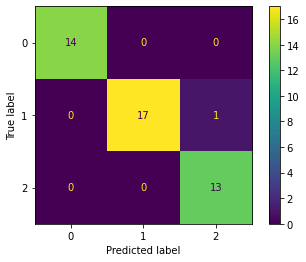

In [4]:
# code
x = data4['data']
y = data4['target']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 1)
classifier = LogisticRegression(random_state = 1)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred) 
print (cm)
print ("Accuracy : ", accuracy_score(y_test, y_pred))
pre_s = precision_score(y_test, y_pred , average=None)
print(pre_s)
ConfusionMatrixDisplay.from_predictions( y_test, y_pred)

#Task 2. 
Apply LogisticRegression to **MNIST** dataset (mnist.csv) which aims at classifying handwritten digits. Dataset includes 784 pixels values of images (28x28). 


```
from sklearn import datasets
# load the MNIST digits dataset
mnist = datasets.load_digits()
```



In [5]:
# code
from sklearn import datasets
# load the MNIST digits dataset
mnist = datasets.load_digits()

[[20  0  0  0  0  0  0  0  0  0]
 [ 0 18  0  0  1  0  0  0  0  0]
 [ 0  0 21  0  0  0  0  0  0  0]
 [ 0  0  0 22  0  0  0  0  0  0]
 [ 1  0  0  0 17  0  0  0  0  0]
 [ 0  1  0  0  0 16  0  0  0  0]
 [ 0  0  0  0  0  0 16  0  0  0]
 [ 0  0  0  0  0  0  0 21  0  0]
 [ 0  0  0  0  0  1  0  0 14  0]
 [ 0  0  0  0  0  1  0  0  0 10]]
Accuracy :  0.9722222222222222
[0.95238095 0.94736842 1.         1.         0.94444444 0.88888889
 1.         1.         1.         1.        ]


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


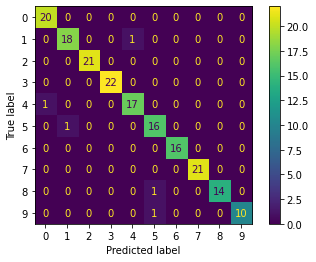

In [6]:
x = mnist['data']
y = mnist['target']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.1, random_state = 1)
classifier = LogisticRegression(random_state = 1)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
con = confusion_matrix(y_test, y_pred) 
print (con)
print ("Accuracy : ", accuracy_score(y_test, y_pred))
pre_s = precision_score(y_test, y_pred , average= None)
print(pre_s)
ConfusionMatrixDisplay.from_predictions( y_test, y_pred)

#Task 3. 
Apply another classification algorithm named kNN, which is an instance classifcation model. 
*  3.1. Perform kNN algorithm to Iris dataset with k={1, 3, 5, …, 29}. Select the best value of k.

*   3.2. Then compare the obtained results with those using Logistic regression (based on metrics: accuracy, precision, recall, f1 measure).


In [7]:
# code
data4 = datasets.load_iris()

Text(0.5, 0, 'K')

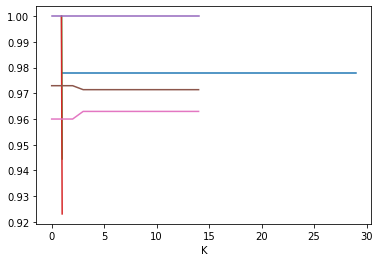

In [10]:
x = data4['data']
y = data4['target']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 1)

x = range(1, 30, 2)
acc = []
pre = []
recall=[]
f1 = []
for n in x:
  
  KNN = KNeighborsClassifier(n_neighbors= n)
  KNN.fit(X_train, y_train)
  y_pred = KNN.predict(X_test)
  acc.append(accuracy_score(y_test, y_pred))
  pre.append(precision_score(y_test, y_pred , average=None))
  recall.append(recall_score(y_test, y_pred , average=None))
  f1.append(f1_score(y_test, y_pred , average=None))
plt.plot(x,acc,pre,recall,f1)
plt.xlabel("K")

#Task 4. 
Similar to Task 3, apply kNN algorithm to **mnist** dataset which included in datasets of sklearn API.
*  4.1.	Perform kNN algorithm to Iris dataset with k={1, 3, 5, …, 29}. Select the best value of k.
*  4.2.	Then compare the obtained results with those using Logistic regression (based on metrics: accuracy, precision, recall, f1 measure).


In [11]:
mnist = datasets.load_digits()

Text(0.5, 0, 'K')

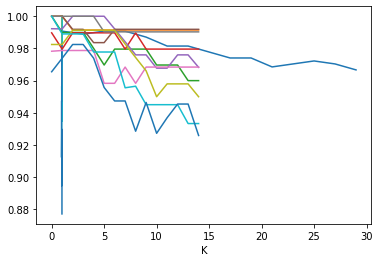

In [13]:
# code

x = mnist['data']
y = mnist['target']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 1)

x = range(1, 30, 2)
acc = []
pre = []
recall=[]
f1 = []
for n in x:
  
  KNN = KNeighborsClassifier(n_neighbors= n)
  KNN.fit(X_train, y_train)
  y_pred = KNN.predict(X_test)
  acc.append(accuracy_score(y_test, y_pred))
  pre.append(precision_score(y_test, y_pred , average=None))
  recall.append(recall_score(y_test, y_pred , average=None))
  f1.append(f1_score(y_test, y_pred , average=None))
plt.plot(x,acc,pre,recall,f1)
plt.xlabel("K")

#Task 5. 
Compare the performance of selected classification algorithms (**Decision Treen, kNN, and Logistic Regression**) to ***spam detection***. The dataset can be accessed from the link: http://archive.ics.uci.edu/ml/datasets/Spambase 
Attribute Information:
The last column of 'spambase.csv denotes whether the e-mail was considered spam (1) or not (0), i.e. unsolicited commercial e-mail. Most of the attributes indicate whether a particular word or character was frequently occuring in the e-mail. The run-length attributes (55-57) measure the length of sequences of consecutive capital letters. For the statistical measures of each attribute, see the end of this file. Here are the definitions of the attributes: 
*  48 continuous real [0,100] attributes of type word_freq_WORD 
= percentage of words in the e-mail that match WORD, i.e. 100 * (number of times the WORD appears in the e-mail) / total number of words in e-mail. A "word" in this case is any string of alphanumeric characters bounded by non-alphanumeric characters or end-of-string. **Example**: word_freq_address: percentage of words in the e-mail that match ADDRESS.
*  6 continuous real [0,100] attributes of type char_freq_CHAR] 
= percentage of characters in the e-mail that match CHAR, i.e. 100 * (number of CHAR occurences) / total characters in e-mail
*  1 continuous real [1,...] attribute of type capital_run_length_average 
= average length of uninterrupted sequences of capital letters
*  1 continuous integer [1,...] attribute of type capital_run_length_longest 
= length of longest uninterrupted sequence of capital letters
*  1 continuous integer [1,...] attribute of type capital_run_length_total = sum of length of uninterrupted sequences of capital letters = total number of capital letters in the e-mail
*  1 nominal {0,1} class attribute of type spam = denotes whether the e-mail was considered spam (1) or not (0), i.e. unsolicited commercial e-mail. 


---


In order to compare the performance of selected algorithms, some common metrics including **accuracy, precision, recall, f1 measures** could be used.


In [ ]:
# code

#Finally,
Save a copy in your Github. Remember renaming the notebook.